# Part II - Exploratory Data Analysis (EDA)


## Analysis:Number of comments Vs Number of upvotes

   Using the data collected in Part I. Understanding the data collected.  
    
   Number of upvotes can depict peoples interest and support towards a specific topic.Number of comments can be      either in favor or can express conflict.
   
   1.If more number of comments and more number of upvotes : it will be an interesting and liked topic.
   2.If more number of comments and less number of upvotes : it can be conflicting topic
   3.If less number of comments and more number of upvotes : it will be a liked topic.
   4.If less number of comments and less number of upvotes : it will be not an interesting or liked topic
   
   Flair with maximum number of comments or upvotes can be classified as trending flair.

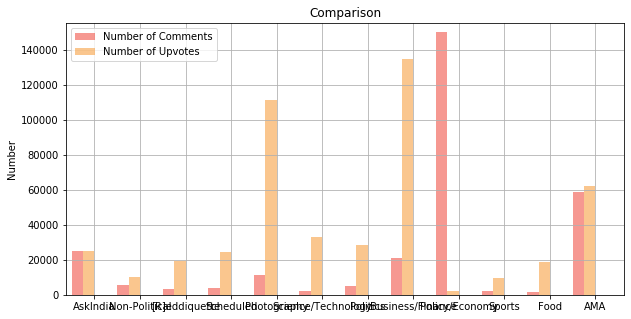

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

posts = pd.read_csv('sample_update_final.csv')
#flairs = ["AskIndia", "Non-Political", "[R]eddiquette", "Scheduled", "Photography", "Science/Technology", "Politics", "Business/Finance", "Policy/Economy", "Sports", "Food", "AMA"]

flairs_comments = {"AskIndia":0,"Non-Political":0,"[R]eddiquette":0,"Scheduled":0,"Photography":0,"Science/Technology":0,"Politics":0, "Business/Finance":0, "Policy/Economy":0, "Sports":0, "Food":0, "AMA":0}
flairs_score = {"AskIndia":0,"Non-Political":0,"[R]eddiquette":0,"Scheduled":0,"Photography":0,"Science/Technology":0,"Politics":0, "Business/Finance":0, "Policy/Economy":0, "Sports":0, "Food":0, "AMA":0}


comments = posts.groupby(['flair'])['num_comments'].agg('sum')
upvotes = posts.groupby(['flair'])['score'].agg('sum')

raw_data = {
			'flair' : ["AskIndia", "Non-Political", "[R]eddiquette", "Scheduled", "Photography", "Science/Technology", "Politics", "Business/Finance", "Policy/Economy", "Sports", "Food", "AMA"],
			'comments' : comments,
			'upvotes' : upvotes				
			}



graph = pd.DataFrame(raw_data,columns=['flair','comments','upvotes'])

pos = list(range(len(graph['comments'])))
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))

#print(graph['flair'][0])

plt.bar(
		pos,
		graph['comments'],
		width,
		alpha = 0.5,
		color='#EE3224', 
		label = graph['flair'][0]
		)

plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        graph['upvotes'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=graph['flair'][1])

ax.set_ylabel('Number')

# Set the chart's title
ax.set_title('Comparison')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(graph['flair'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(graph['comments']+graph['upvotes'])])

# Adding the legend and showing the plot
plt.legend(['Number of Comments', 'Number of Upvotes'], loc='upper left')
plt.grid()
plt.show()